# Analysis of contingency tables

## Libraries and settings

In [119]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Get current working directory
print(os.getcwd())

/workspaces/DA_Project/Project/Additional/4


## Import the apartment data

In [120]:
# Read data to pandas data frame
df_orig = pd.read_csv('bmw_data_prepared.csv', 
                      sep=',', 
                      encoding='utf-8')

# Copy of data with selected colums
columns = [ 'web-scraper-order', 
                    'model_raw',
                    'Location',
                    'PLZ',
                    'Year',
                    'price',
                    'km',
                    'luxury',
                    'competition',
                    'xDrive',
                    'automat',
                    'km_cat',
                    'km_per_year',
                    'km_per_year_cat']
df = df_orig[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'bmw_id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

,bmw_id,web-scraper-start-url,text_raw,price_raw,model_raw,type_year_km_transmission_fuel,Location,PLZ,km_raw,Year,price,km,luxury,competition,xDrive,automat,km_cat,km_per_year,km_per_year_cat
0,1705078003-1,https://www.comparis.ch/carfinder/marktplatz/b...,BMW X3 X3 XDRIVE 20D XLINE STEPTRONICCHF 22'90...,CHF 22'900,X3 xDrive 20d xLine Steptronic,Occasion05.2016119.500 kmAutomatDiesel1227 (GE),GE,1227,119.500,2016,22900,119500.0,0,0,1,1,50-120k,14937.50,medium
1,1705078003-2,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 540 540ICHF 13'750AB CHF 220 / MONAT5 / 6O...,CHF 13'750,540i,Occasion05.2006124.900 kmAutomatBenzin4461 (BL),BL,4461,124.900,2006,13750,124900.0,0,0,0,1,120k+,6938.89,low
2,1705078003-3,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 225 ACTIVE TOURER 225XE IPERFORMANCE ACTIV...,CHF 28'800,225xe iPerformance Active Tourer Steptronic M ...,Occasion09.201928.950 kmAutomatBenzin/Elektro4...,BL,4460,28.950,2019,28800,28950.0,0,0,0,1,0-50k,5790.00,low
3,1705078003-4,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 316 316I COMPACTCHF 1'100OCCASION04.200024...,CHF 1'100,316i Compact,Occasion04.2000248.013 kmAutomatBenzin6300 (ZG),ZG,6300,248.013,2000,1100,248013.0,0,0,0,1,120k+,10333.88,medium
4,1705078003-5,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 530 530XI STEPTRONICCHF 10'900AB CHF 175 /...,CHF 10'900,530xi Steptronic,Occasion06.2008160.000 kmAutomatBenzin6010 (LU),LU,6010,160.000,2008,10900,160000.0,0,0,0,1,120k+,10000.00,low


## Create a new categorical variable based on the price_per_m2

### Plot histogram of price_per_m2

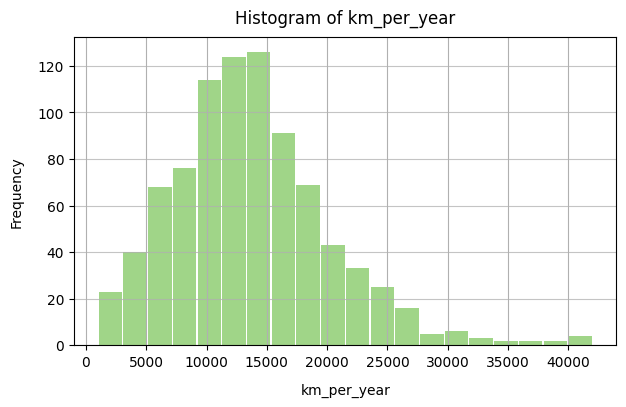

In [121]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['km_per_year'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('km_per_year', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of km_per_year', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Show quantiles of price_per_m2

In [122]:
qt_price = df['km_per_year'].quantile(q=[0.10, 0.25, 0.50, 0.75, 0.90]).round(1)
qt_price

0.10     6000.0
0.25     9400.0
0.50    13168.9
0.75    17135.4
0.90    22150.0
Name: km_per_year, dtype: float64

## Create a new categorical variable based on the living area

### Plot histogram of area

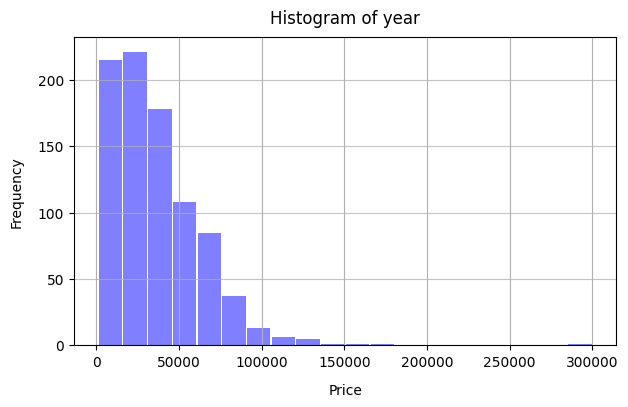

In [123]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price'], 
                            bins=20, 
                            color='blue',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of year', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Show quantiles of area

In [124]:
qt_area = df['price'].quantile(q=[0.10, 0.25, 0.50, 0.75, 0.90]).round(1)
qt_area

0.10     7900.0
0.25    16500.0
0.50    30945.0
0.75    51900.0
0.90    69900.0
Name: price, dtype: float64

### Create new categorical variable 'area_cat'

In [125]:
# Create labels
labels = ['0 - 15000', '15001-30000', '30001 - 50000', '50001 - 100000', '100000+']

# Create new categorical variable
df["price_cat"] = pd.cut(df['price'], bins=[0, 15001, 30001, 50001, 100001, 500000], labels=labels)

# Check values
df[['price', 'price_cat']].head(5)

,price,price_cat
0,22900,15001-30000
1,13750,0 - 15000
2,28800,15001-30000
3,1100,0 - 15000
4,10900,0 - 15000


## Create a contingency table with the number of apartments per 'area_cat' versus 'price_cat'

In [126]:
# Contingency table (numbers in the table are apartments)
tab = pd.pivot_table(df[['bmw_id', 'km_cat', 'price_cat']],
                     index=['km_cat'],
                     columns=['price_cat'], 
                     aggfunc='count')
tab

bmw_id                                                 
price_cat 0 - 15000 15001-30000 30001 - 50000 50001 - 100000 100000+
km_cat                                                              
0-50k             1          27            81            142      15
120k+           183          98            24              3       1
50-120k          24          99           109             62       3

## Perform a Chi-square test on the contingency table
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [127]:
# 1-alpha
prob = 0.95

# Chi-squared test
stat, p, dof, expected = chi2_contingency(tab)

# Critical value
critical = chi2.ppf(prob, dof)

# Print results of the Chi-square test
print('Expected frequencies:', '\n', expected.round(4), '\n')
print('Critical value:', critical.round(4), '\n')
print('Test statistic:', stat.round(4), '\n')
print('Degrees of freedom:', dof, '\n')
print(f'p-value: {p:.4f}')

Expected frequencies: 
 [[63.4495 68.3303 65.2798 63.1445  5.7959]
 [73.7064 79.3761 75.8326 73.3521  6.7328]
 [70.844  76.2936 72.8876 70.5034  6.4713]] 

Critical value: 15.5073 

Test statistic: 536.0713 

Degrees of freedom: 8 

p-value: 0.0000


## Interpretation of the Chi-squared test result

<p>Because the test statistic is larger than the critical value and the p-value is smaller than our significance level apha=0.05, we can reject the null hypothesis, i.e. there is a statistically significant (at the 0.05 significance-level) association between the price-categories and the living-area categories in the contingence table.</p>

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [128]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1018-azure
Datetime: 2024-01-12 20:55:11
Python Version: 3.10.13
-----------------------------------
